In [1]:
#Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# **Introduction**

* The dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

***Data Dictionary***

* PatientId: patient unique ID
* AppointmentID: appointment unique ID
* Gender: Male or Female
* ScheduledDay: the day someone called or registered the appointment, this is before appointment of course
* AppointmentDay: the day of the actual appointment, when they have to visit the doctor
* Age: How old is the patient
* Neighbourhood: where the appointment takes place
* Scholarship: True of False
* Hipertension: True or False
* Diabetes: True or False
* Alcoholism: True or False
* Handcap: True or False
* SMS_received: True or False
* No-show : True or False

 *  ‘ScheduledDay’ tells us on what day the patient set up their appointment.
 *  ‘Neighborhood’ indicates the location of the hospital.
 *  ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

The aim is to identify the factors that majorly influence patients not showing up to appointments.BUt first, Let us perform some data wrangling on it

## **Data Wrangling**

In [2]:
#Loading the dataset
df=pd.read_csv('/content/noshowappointments.csv')
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df.shape

(110527, 14)

We can see that our dataset has **110527 rows** and **14 columns**.Let us dive deeper to see the datatypes as well as non-null values


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

* ScheduledDay & Appointment Day read as a string objects.
These need te be changed to datetime objects.

* PatientId reads as a float object.While performing aggregate functions it is likely this will be affected.Let us change this to a string object


In [8]:
import datetime

#Changing the datatypes
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

#Confirming changes have been made
df[['ScheduledDay','AppointmentDay']].dtypes




ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object

In [9]:
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

Now that we have datetime objects we can create columns to:
* show difference between appointment day and scheduled day .
* identify period of day an appointment was scheduled.

In [10]:
#Creating period of day column
df['period'] = (df['ScheduledDay'].dt.hour % 24 + 4) // 4
df['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
df['period'].unique()

array(['Evening', 'Morning', 'Noon', 'Early Morning', 'Night'],
      dtype=object)

In [11]:
#Days between appointment day and scheduled day
df['ScheduledDay_Date'] = df.ScheduledDay.dt.normalize()
df['AppointmentDay_Date'] = df.AppointmentDay.dt.normalize()
df['Days_between']=(df['AppointmentDay_Date']-df['ScheduledDay_Date']).dt.days

In [12]:

print(sorted(df['Days_between'].unique()))

[-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]


We can see negative days which indicate an appointment was scheduled after the actual appointment date which is actually wrong.Let us deep dive into the rows with negative days and drop them

In [13]:
df.query('Days_between < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,period,ScheduledDay_Date,AppointmentDay_Date,Days_between
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Morning,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,-1
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Noon,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,-1
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Noon,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,-1
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Noon,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,-6
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Early Morning,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,-1


In [14]:
#Dropping rows
df.drop(index=[27033,55226,64175,71533,72362],inplace=True)

#Confirm changes have been made
df.query('Days_between < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,period,ScheduledDay_Date,AppointmentDay_Date,Days_between


In [15]:
#Changing datatypes
df['PatientId'] = df['PatientId'].apply(lambda x: str(int(x)))

#Confirming changes have been made
df['PatientId'].dtype

dtype('O')

In [16]:
df.describe()

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Days_between
count,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,5.675305e+06,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040,10.184253
std,7.129722e+04,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878,15.255115
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680574e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,5.725525e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


At first glance,the minimum age shows -1 which is an outlier and should be dropped.Let us check if there are more values such as this.



In [17]:
#Checking for outlier values in the Age column
print(sorted(df['Age'].unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [18]:
#Checking the row number of the outlier
df.query('Age == -1')



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,period,ScheduledDay_Date,AppointmentDay_Date,Days_between
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,Morning,2016-06-06 00:00:00+00:00,2016-06-06 00:00:00+00:00,0


In [19]:
#Dropping outlier row in age column
df.drop(99832,inplace=True)



In [20]:
#Checking if row has been dropped
df.shape

(110521, 18)

In [21]:
df.nunique()

PatientId               62298
AppointmentID          110521
Gender                      2
ScheduledDay           103543
AppointmentDay             27
Age                       103
Neighbourhood              81
Scholarship                 2
Hipertension                2
Diabetes                    2
Alcoholism                  2
Handcap                     5
SMS_received                2
No-show                     2
period                      5
ScheduledDay_Date         111
AppointmentDay_Date        27
Days_between              129
dtype: int64

From the data dictionary,Handcap should be a boolean value but we can see it has 5 values.Let us investigate what values these are


In [22]:
#Checking unique values

df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [23]:
#Changing Handcap column to boolean
df['Handcap'] = np.where(df['Handcap']>0, 1, 0)

#Confirming changes have been made
df['Handcap'].unique()

array([0, 1])

The last column 'No-Show' says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.This can be a little confusing.Let us rename this column to 'Showed Up' and interchange the values for clarity purposes

In [24]:

#Changing the column name and Interchanging the values

df=df.rename(columns={'No-show':'ShowedUp'})
df['ShowedUp']=df['ShowedUp'].replace({'No':'Yes','Yes':'No'})

#Confirming if the changes have been made
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ShowedUp,period,ScheduledDay_Date,AppointmentDay_Date,Days_between
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,Evening,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,Evening,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,Evening,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,Evening,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,Evening,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0


# **Exploratory Data Analysis**

*What are the factors that majorly influence patients not showing up to appointments?*


*Univariate Analysis :Numerical Variables*

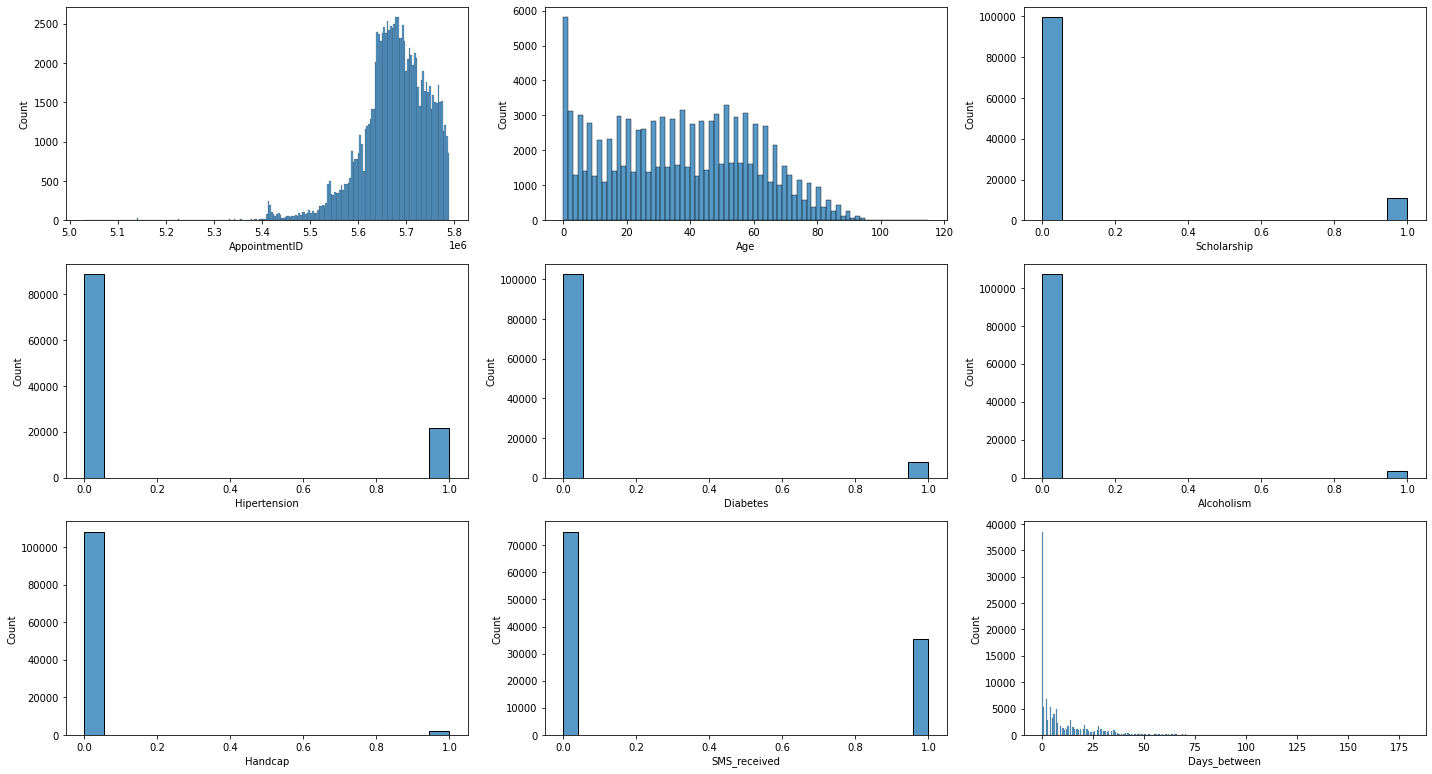

In [25]:
cols = 3
rows = 4
num_cols = df.select_dtypes(exclude=['object','datetime64[ns, UTC]']).columns
fig = plt.figure(figsize= (20,14))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.histplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

In [26]:
df.describe(exclude=['object','datetime64[ns, UTC]'])

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Days_between
count,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.020259,0.321043,10.184345
std,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.140884,0.466879,15.255153
min,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


*Univariate Analysis :Categorical Variables*

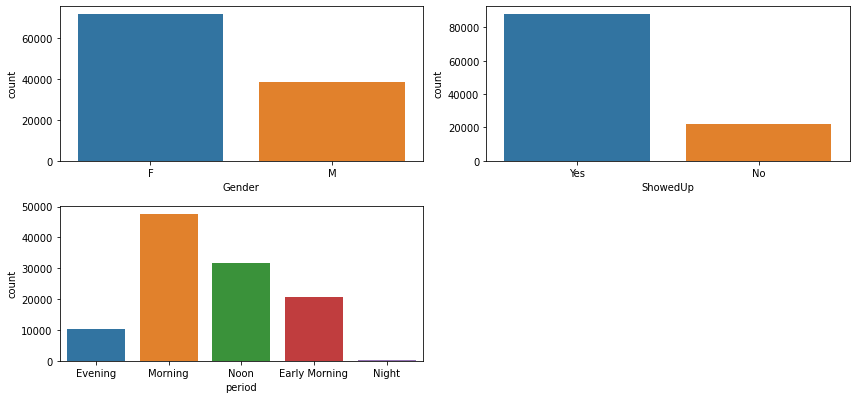

In [27]:
#Univariate analysis of categorical features
rows=3
cols=2
fig = plt.figure(figsize= (12,8))
all_categs = df.select_dtypes(include='object')
categ_cols = all_categs.columns[all_categs.nunique()<10]
for i, col in enumerate(categ_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x=df[col], ax=ax)
    
    
    
fig.tight_layout()  
plt.show()

In [28]:
df.describe(include='object')

,PatientId,Gender,Neighbourhood,ShowedUp,period
count,110521,110521,110521,110521,110521
unique,62298,2,81,2,5
top,822145925426128,F,JARDIM CAMBURI,Yes,Morning
freq,88,71836,7717,88207,47688


*General Property*

In [29]:
df.groupby('ShowedUp')['PatientId'].count()

ShowedUp
No     22314
Yes    88207
Name: PatientId, dtype: int64

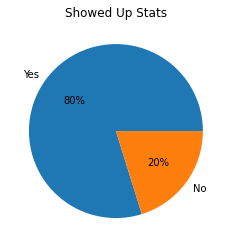

In [30]:
df1 = df['ShowedUp'].value_counts()
plt.pie(df1, labels=df1.index, autopct="%.0f%%")
plt.title('Showed Up Stats');

Majority of the patients showed up for their appointments.Let us deep dive into the individual properties,starting with:




1.   Gender




In [31]:
df.groupby('Gender')['ShowedUp'].value_counts().sort_values(ascending=False)

Gender  ShowedUp
F       Yes         57245
M       Yes         30962
F       No          14591
M       No           7723
Name: ShowedUp, dtype: int64

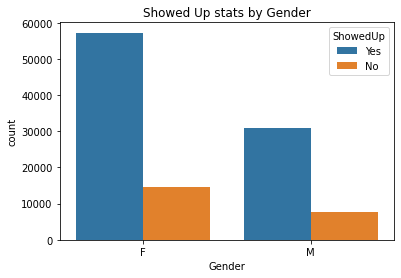

In [32]:
ax = sns.countplot(x=df['Gender'], hue=df['ShowedUp'], data=df)
ax.set_title("Showed Up stats by Gender")
plt.show()

Female patients seem to miss appointments more than Male patients.This can be attributed to Female patients juggling the biggest role of caregiving in most households which would be a great contributor to them missing appointments.

2. Neighbourhood

In [33]:
df.groupby('Neighbourhood')['ShowedUp'].value_counts().sort_values(ascending=False)

Neighbourhood                ShowedUp
JARDIM CAMBURI               Yes         6252
MARIA ORTIZ                  Yes         4586
RESISTÊNCIA                  Yes         3525
JARDIM DA PENHA              Yes         3246
SANTA MARTHA                 Yes         2635
                                         ... 
ILHA DO BOI                  No             3
ILHA DO FRADE                No             2
ILHAS OCEÂNICAS DE TRINDADE  No             2
AEROPORTO                    No             1
PARQUE INDUSTRIAL            Yes            1
Name: ShowedUp, Length: 160, dtype: int64

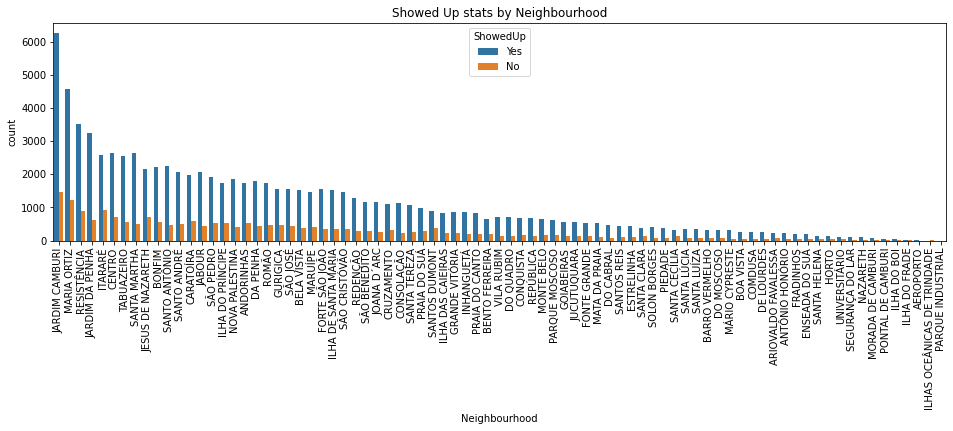

In [34]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df['Neighbourhood'], hue=df['ShowedUp'], data=df,order=df['Neighbourhood'].value_counts().index)
ax.set_title("Showed Up stats by Neighbourhood")
plt.show()



'JARDIM CAMBURI' & 'MARIA ORTIZ' Neighbourhood seem to be leading in both maximum number of patients who showed up and those that did not show up.



3. Age




In [35]:
df.groupby('Age')['ShowedUp'].value_counts().sort_values(ascending=False)

Age  ShowedUp
0    Yes         2900
1    Yes         1858
52   Yes         1449
56   Yes         1372
2    Yes         1366
                 ... 
115  Yes            2
97   No             2
99   Yes            1
98   No             1
96   No             1
Name: ShowedUp, Length: 203, dtype: int64

In [36]:
#Binning ages into groups
bins = [0,20,40,60,80]
labels = ['0-19', '20-39', '40-59', '80+']
df['Age_cat']=pd.cut(x=df['Age'],bins=bins,labels=labels)
df['Age_cat']


0           80+
1         40-59
2           80+
3          0-19
4         40-59
          ...  
110522    40-59
110523    40-59
110524    20-39
110525    20-39
110526    40-59
Name: Age_cat, Length: 110521, dtype: category
Categories (4, object): ['0-19' < '20-39' < '40-59' < '80+']

In [37]:
df1=df.query('ShowedUp == "No"')
df1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ShowedUp,period,ScheduledDay_Date,AppointmentDay_Date,Days_between,Age_cat
6,733688164476661,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,No,Noon,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,2,20-39
7,3449833394123,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,No,Noon,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,2,20-39
11,7542951368435,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,No,Morning,2016-04-26 00:00:00+00:00,2016-04-29 00:00:00+00:00,3,20-39
17,14794966191172,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,No,Morning,2016-04-28 00:00:00+00:00,2016-04-29 00:00:00+00:00,1,20-39
20,622257462899397,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,Early Morning,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,2,20-39


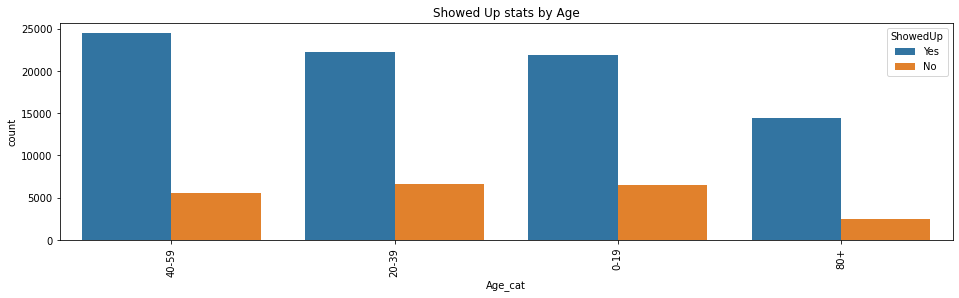

In [38]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df['Age_cat'], hue=df['ShowedUp'], data=df,order=df['Age_cat'].value_counts().index)
ax.set_title("Showed Up stats by Age")
plt.show()

Ages between 0 and 39 miss appointments more than above 40 years



4. Scholarship


In [39]:
df.groupby('Scholarship')['ShowedUp'].value_counts().sort_values(ascending=False)

Scholarship  ShowedUp
0            Yes         79924
             No          19736
1            Yes          8283
             No           2578
Name: ShowedUp, dtype: int64

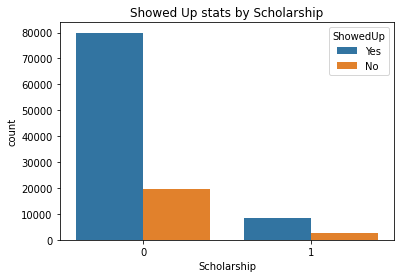

In [40]:
ax = sns.countplot(x=df['Scholarship'], hue=df['ShowedUp'], data=df)
ax.set_title("Showed Up stats by Scholarship")
plt.show()

Those that miss appointments do not have Scholarship.This could mean,they are unable to afford the visit to the hospital due to poverty conditions.

5. Hipertension

In [41]:
df.groupby('Hipertension')['ShowedUp'].value_counts().sort_values(ascending=False)

Hipertension  ShowedUp
0             Yes         70178
              No          18542
1             Yes         18029
              No           3772
Name: ShowedUp, dtype: int64

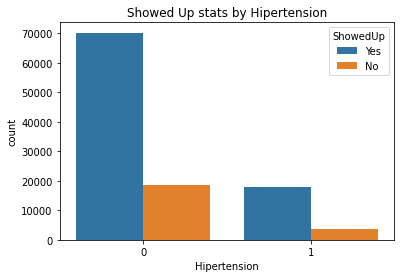

In [42]:
ax = sns.countplot(x=df['Hipertension'], hue=df['ShowedUp'], data=df)
ax.set_title("Showed Up stats by Hipertension")
plt.show()

Patients without Hipertension are unlikely to miss appointments as Hipertension is life threatening and may require extra attention and care.

6. Diabetes

In [43]:
df.groupby('Diabetes')['ShowedUp'].value_counts().sort_values(ascending=False)

Diabetes  ShowedUp
0         Yes         81694
          No          20884
1         Yes          6513
          No           1430
Name: ShowedUp, dtype: int64

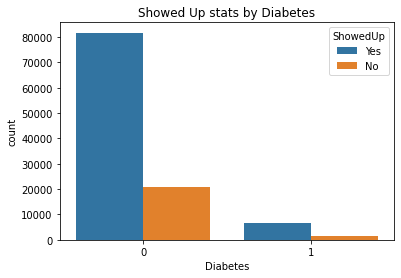

In [44]:
ax = sns.countplot(x=df['Diabetes'], hue=df['ShowedUp'], data=df)
ax.set_title("Showed Up stats by Diabetes")
plt.show()

Patients without diabetes are more likely to miss appointments as the level of urgency and life threatening potential is completely on different scales

7. Alcoholism

In [45]:
df.groupby('Alcoholism')['ShowedUp'].value_counts().sort_values(ascending=False)

Alcoholism  ShowedUp
0           Yes         85524
            No          21637
1           Yes          2683
            No            677
Name: ShowedUp, dtype: int64

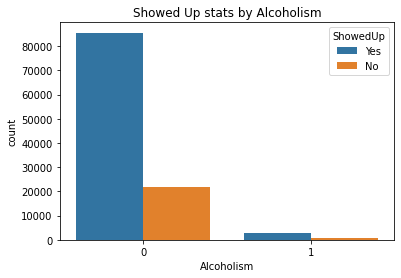

In [46]:
ax = sns.countplot(x=df['Alcoholism'], hue=df['ShowedUp'], data=df)
ax.set_title("Showed Up stats by Alcoholism")
plt.show()

Non alcoholic patients are likely to miss appointments more than alcoholic patients

---



8. Handcap

In [47]:
df.groupby('Handcap')['ShowedUp'].value_counts().sort_values(ascending=False)

Handcap  ShowedUp
0        Yes         86373
         No          21909
1        Yes          1834
         No            405
Name: ShowedUp, dtype: int64

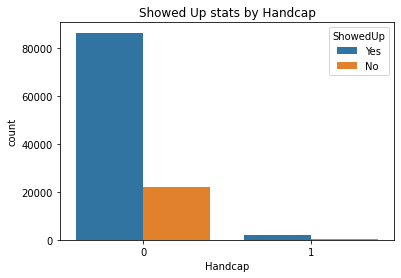

In [48]:
ax = sns.countplot(x=df['Handcap'], hue=df['ShowedUp'], data=df)
ax.set_title("Showed Up stats by Handcap")
plt.show()

Non handcap patients miss appointments more than Handcap patients

9. Days_between

In [49]:
print(sorted(df['Days_between'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]


In [50]:
#Placing into categories days between the scheduled day and appointment day
bins= [0,7,14,30,90,180]
labels = ['Same Day','Week','Fortnight','Month','Quarter']
df['Days_between_group'] = pd.cut(df['Days_between'], bins=bins, labels=labels, right=False)
print (df['Days_between_group'])

0         Same Day
1         Same Day
2         Same Day
3         Same Day
4         Same Day
            ...   
110522       Month
110523       Month
110524       Month
110525       Month
110526       Month
Name: Days_between_group, Length: 110521, dtype: category
Categories (5, object): ['Same Day' < 'Week' < 'Fortnight' < 'Month' < 'Quarter']


In [51]:
df.groupby('Days_between_group')['ShowedUp'].value_counts().sort_values(ascending=False)

Days_between_group  ShowedUp
Same Day            Yes         57586
Fortnight           Yes         13193
Week                Yes          9958
Same Day            No           8255
Month               Yes          7265
Fortnight           No           6387
Week                No           4060
Month               No           3542
Quarter             Yes           205
                    No             70
Name: ShowedUp, dtype: int64

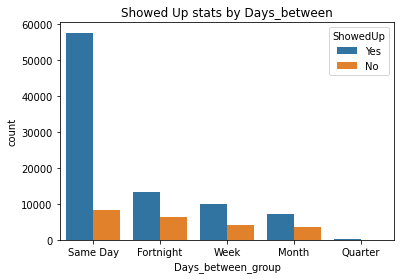

In [52]:
ax = sns.countplot(x=df['Days_between_group'], hue=df['ShowedUp'], data=df,order=df['Days_between_group'].value_counts().index)
ax.set_title("Showed Up stats by Days_between")
plt.show()

Appointments scheduled on the same day and two weeks before are mostly missed than those stretching beyond a month

10. Period

In [53]:
df.groupby('period')['ShowedUp'].value_counts().sort_values(ascending=False)

period         ShowedUp
Morning        Yes         37991
Noon           Yes         24726
Early Morning  Yes         17577
Morning        No           9697
Evening        Yes          7841
Noon           No           6935
Early Morning  No           3213
Evening        No           2438
Night          Yes            72
               No             31
Name: ShowedUp, dtype: int64

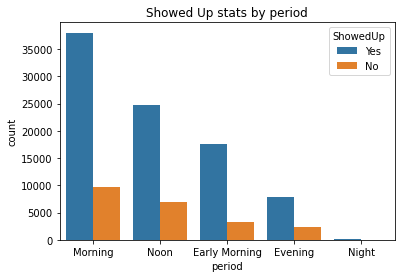

In [54]:
ax = sns.countplot(x=df['period'], hue=df['ShowedUp'], data=df,order=df['period'].value_counts().index)
ax.set_title("Showed Up stats by period")
plt.show()

Appointments scheduled between morning hours and noon are missed more than those scheduled at night.This could be contributed to the level of urgency decreasing
as period of the day lapses from noon to the actual appointment date.

11. SMS_received

In [55]:
df.groupby('SMS_received')['ShowedUp'].value_counts().sort_values(ascending=False)

SMS_received  ShowedUp
0             Yes         62509
1             Yes         25698
0             No          12530
1             No           9784
Name: ShowedUp, dtype: int64

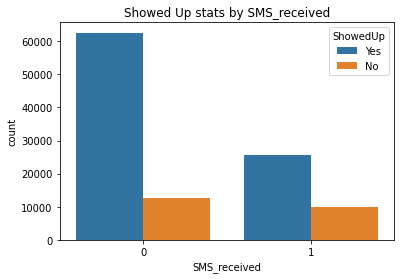

In [56]:
ax = sns.countplot(x=df['SMS_received'], hue=df['ShowedUp'], data=df)
ax.set_title("Showed Up stats by SMS_received")
plt.show()

Patients who did not receive notifications of their appointments miss appointments more than those that receive at least one notification


All the above features contribute to patients missing appointments.However,to identify the most important feautures,we would have to find the correlation between variables.Let us do that using a correlation matrix

In [57]:
#Label encoding the showed up column
df['ShowedUp_encoded']=df['ShowedUp'].replace({'No':0,'Yes':1})





In [58]:
df.corr()

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Days_between,ShowedUp_encoded
AppointmentID,1.000000,-0.019109,0.022620,0.012760,0.022633,0.032947,0.015094,-0.256614,-0.771840,0.162619
Age,-0.019109,1.000000,-0.092469,0.504599,0.292398,0.095811,0.083827,0.012629,0.034813,0.060320
Scholarship,0.022620,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.009068,0.001182,-0.030435,-0.029166
Hipertension,0.012760,0.504599,-0.019738,1.000000,0.433082,0.087967,0.084949,-0.006285,-0.017236,0.035662
Diabetes,0.022633,0.292398,-0.024899,0.433082,1.000000,0.018471,0.059204,-0.014561,-0.027200,0.015158
Alcoholism,0.032947,0.095811,0.035019,0.087967,0.018471,1.000000,0.003715,-0.026154,-0.038527,0.000181
Handcap,0.015094,0.083827,-0.009068,0.084949,0.059204,0.003715,1.000000,-0.025148,-0.020885,0.007528
SMS_received,-0.256614,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.025148,1.000000,0.398128,-0.126502
Days_between,-0.771840,0.034813,-0.030435,-0.017236,-0.027200,-0.038527,-0.020885,0.398128,1.000000,-0.186320
ShowedUp_encoded,0.162619,0.060320,-0.029166,0.035662,0.015158,0.000181,0.007528,-0.126502,-0.186320,1.000000


Summary :*What are the factors that majorly influence patients not showing up to appointments?*

* The top variables that are positively correlated with showing up to an appointment are ***Age ,Hipertension , Diabetes , SMS_received *** respectively.

* Ages between 0 and 39 equally miss appointments as well as show up to appointments.These ages are unpredictable in determining for sure if a patient will miss an appointment.

* Patients with Hipertension and Diabetes miss appointments more than those with other diseases.

* Patients who did not receive notifications of their appointments miss appointments more than those that receive at least one notification

* A limitation of this dataset is the inability to know what period of day an appointment was scheduled for.This could play a major part in establishing if a patient missed an appointment because it was too early or too late.

